In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('amazon_prime_users.csv')
df.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


# **Preprocess Dataset**

renaming columns

In [3]:
df = df.rename(columns={
    'Name': 'name',
    'Email Address': 'email_address',
    'Username': 'username',
    'Date of Birth': 'date_of_birth',
    'Gender': 'gender',
    'Location': 'location',
    'Membership Start Date': 'membership_start_date',
    'Membership End Date': 'membership_end_date',
    'Subscription Plan': 'subscription_plan',
    'Payment Information': 'payment_information',
    'Renewal Status':'renewal_status',
    'Usage Frequency': 'usage_frequency',
    'Purchase History': 'purchase_history',
    'Favorite Genres': 'favorite_genres',
    'Devices Used': 'device_used',
    'Engagement Metrics': 'engagement_metrics',
    'Feedback/Ratings': 'feedback/ratings',
    'Customer Support Interactions': 'customer_support_interactions'
})

df.head()

,User ID,name,email_address,username,date_of_birth,gender,location,membership_start_date,membership_end_date,subscription_plan,payment_information,renewal_status,usage_frequency,purchase_history,favorite_genres,device_used,engagement_metrics,feedback/ratings,customer_support_interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


drop unused column

In [4]:
df = df.drop(columns=['email_address', 'username'])
df.head()

,User ID,name,date_of_birth,gender,location,membership_start_date,membership_end_date,subscription_plan,payment_information,renewal_status,usage_frequency,purchase_history,favorite_genres,device_used,engagement_metrics,feedback/ratings,customer_support_interactions
0,1,Ronald Murphy,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   name                           2500 non-null   object 
 2   date_of_birth                  2500 non-null   object 
 3   gender                         2500 non-null   object 
 4   location                       2500 non-null   object 
 5   membership_start_date          2500 non-null   object 
 6   membership_end_date            2500 non-null   object 
 7   subscription_plan              2500 non-null   object 
 8   payment_information            2500 non-null   object 
 9   renewal_status                 2500 non-null   object 
 10  usage_frequency                2500 non-null   object 
 11  purchase_history               2500 non-null   object 
 12  favorite_genres                2500 non-null   o

In [6]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['membership_start_date'] = pd.to_datetime(df['membership_start_date'])
df['membership_end_date'] = pd.to_datetime(df['membership_end_date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   User ID                        2500 non-null   int64         
 1   name                           2500 non-null   object        
 2   date_of_birth                  2500 non-null   datetime64[ns]
 3   gender                         2500 non-null   object        
 4   location                       2500 non-null   object        
 5   membership_start_date          2500 non-null   datetime64[ns]
 6   membership_end_date            2500 non-null   datetime64[ns]
 7   subscription_plan              2500 non-null   object        
 8   payment_information            2500 non-null   object        
 9   renewal_status                 2500 non-null   object        
 10  usage_frequency                2500 non-null   object        
 11  purchase_history 

# **Feature Engineering**

add age columns

In [8]:
df['age'] = 2024 - df['date_of_birth'].dt.year

add membership duration

In [9]:
df['membership_duration'] = df['membership_end_date'] - df['membership_start_date']

In [10]:
df.head()

,User ID,name,date_of_birth,gender,location,membership_start_date,membership_end_date,subscription_plan,payment_information,renewal_status,usage_frequency,purchase_history,favorite_genres,device_used,engagement_metrics,feedback/ratings,customer_support_interactions,age,membership_duration
0,1,Ronald Murphy,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3,71,365 days
1,2,Scott Allen,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7,46,365 days
2,3,Jonathan Parrish,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8,30,365 days
3,4,Megan Williams,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7,60,365 days
4,5,Kathryn Brown,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1,63,365 days


# **Visualization**

In [11]:
import matplotlib.pyplot as plt

## Visualization user age between 18 and 40

In [13]:
adult_age = df[(df['age'] <= 40) & (df['age'] >= 18)]

Adult gender distribution

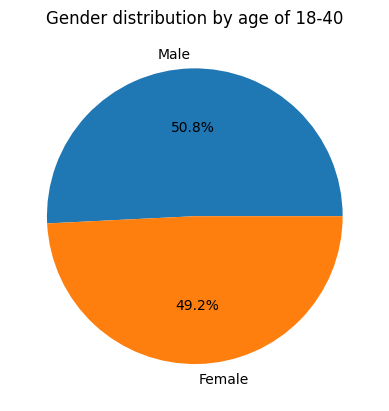

In [14]:
gender_counts = adult_age['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender distribution by age of 18-40')
plt.show()

**favorite genres from adult users (age between 18 and 40)**

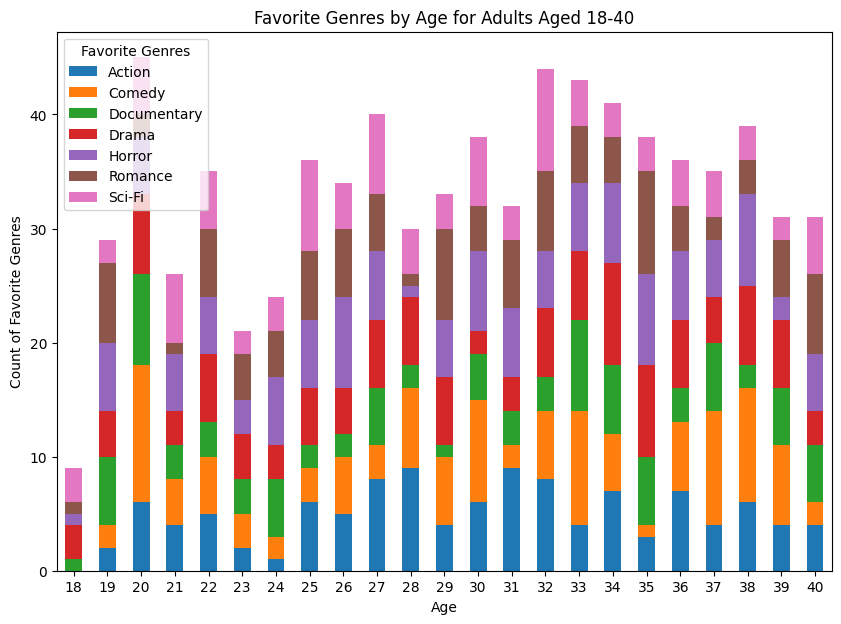

In [15]:

age_genre_counts = pd.crosstab(adult_age['age'], adult_age['favorite_genres'])

# Plotting
age_genre_counts.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Count of Favorite Genres')
plt.title('Favorite Genres by Age for Adults Aged 18-40')
plt.legend(title='Favorite Genres')
plt.show()


**Devices Used by Adults aged 18-40**

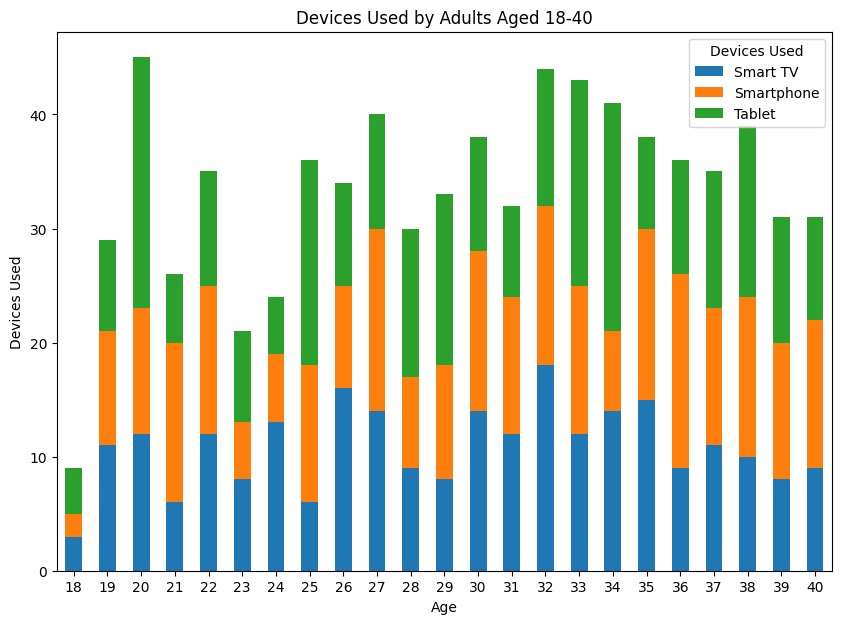

In [16]:
age_device_counts = pd.crosstab(adult_age['age'], adult_age['device_used'])

age_device_counts.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Devices Used')
plt.title('Devices Used by Adults Aged 18-40')
plt.legend(title='Devices Used')
plt.show()

purchase history by adult aged 18-40

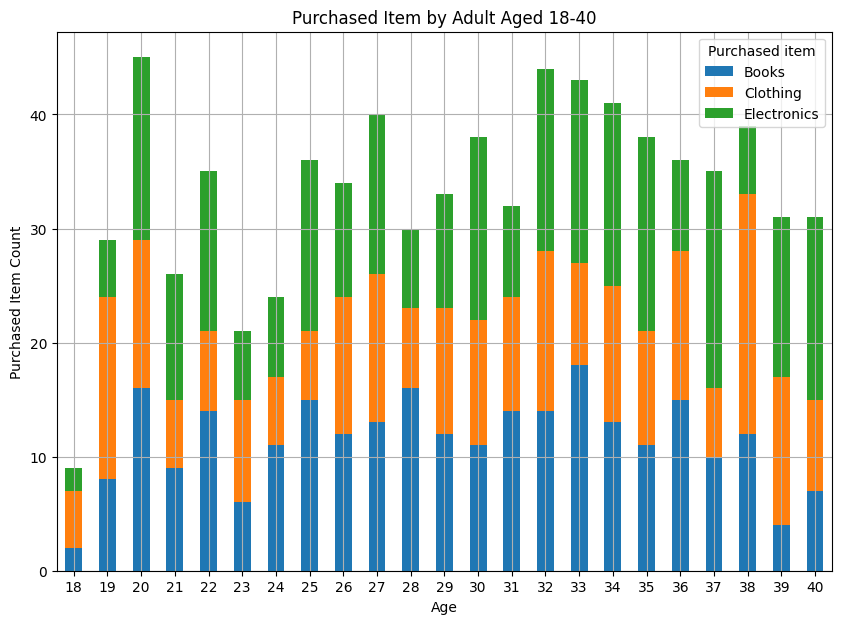

In [17]:
age_purchase = pd.crosstab(adult_age['age'], adult_age['purchase_history'])
age_purchase.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Age')
plt.xticks(rotation=0)
plt.grid(True)
plt.ylabel('Purchased Item Count'),
plt.title('Purchased Item by Adult Aged 18-40')
plt.legend(title='Purchased item')
plt.show()

Conclusion: The most users to purchase is from age 21 and electronics is the most purchased items

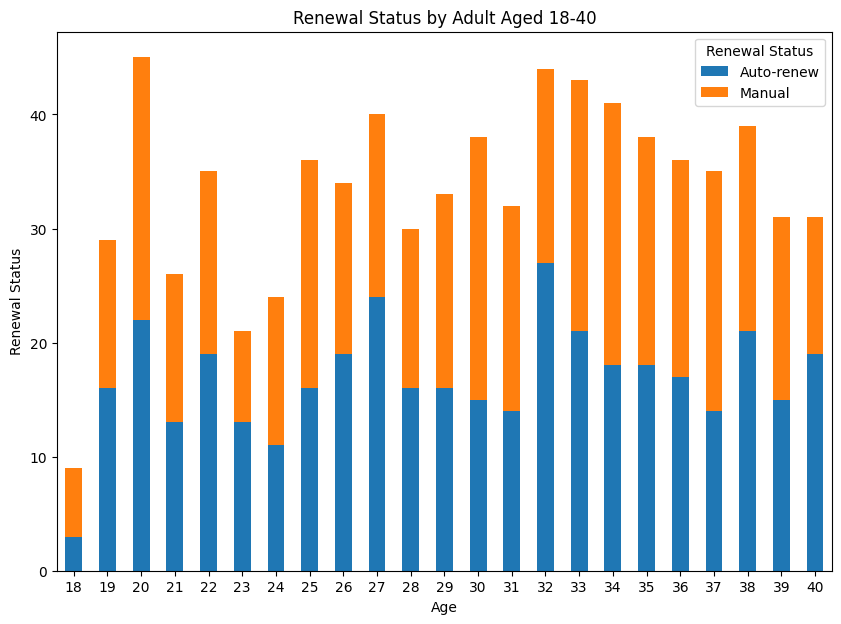

In [18]:
adult_renewal_status = pd.crosstab(adult_age['age'], adult_age['renewal_status'])

adult_renewal_status.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Renewal Status'),
plt.title('Renewal Status by Adult Aged 18-40')
plt.legend(title='Renewal Status')
plt.show()